# Проект: Обучение с учителем: качество модели
# Описание проекта

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

# Цель
Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.
# Описание данных
Данные для работы находятся в нескольких таблицах. Нажмите на название файла, чтобы его скачать.

`market_file.csv`

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

`market_money.csv`

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.

`market_time.csv`

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

`money.csv`

Таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

## Загрузка данных

In [1]:
!pip install matplotlib==3.5.0 -q
# !pip install --upgrade pandas -q
# !pip install mxnet-mkl==1.6.0 numpy==1.23.1
!pip install phik -q

In [2]:
!pip install --upgrade scikit-learn -q
# !pip install --upgrade sklearn-preprocessing -q

In [3]:
!pip install mlxtend -q

In [4]:
!pip install shap -q

In [5]:
!pip install optuna -q
!pip install optuna-integration[sklearn] -q

In [6]:
# !pip install sklearn -q

In [7]:
import sklearn
import pandas as pd
import re
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import phik
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import (OneHotEncoder,
                                   StandardScaler,
                                  LabelEncoder,
                                  OrdinalEncoder,
                                  MinMaxScaler,
                                   RobustScaler)
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import (r2_score,
                             mean_absolute_error, 
                             mean_squared_error,
                            roc_auc_score)

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (accuracy_score, 
                             recall_score, 
                             precision_score, 
                             confusion_matrix)
from scipy import stats as st

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from optuna.integration import OptunaSearchCV


import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

from mlxtend.plotting import plot_decision_regions
from itertools import combinations
import shap

In [8]:
try:
    market_file = pd.read_csv('/datasets/market_file.csv')
    market_money = pd.read_casv('/datasets/market_money.csv')
    market_time = pd.read_csv('/datasets/market_time.csv')
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal = ',')
except:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal = ',')

Выгружены данные в переменные `market_file`, `market_money`, `market_time`, `money`.

### Датасет `market_file`

In [9]:
market_file.info()
market_file.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

(1300, 13)

In [10]:
market_file.head()

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

В датасете `market_file` 1 300 строк и 13 столбцов, типы столбца соответствуют данным. Пропуски отсутствуют.

Приведем столбцы к змеиному стилю:

In [11]:
market_file.columns = (
    market_file.columns
    .str.replace(' ', '_')
    .str.lower()
)
#проверяем
print(market_file.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')


### Датасет `market_money`

In [12]:
market_money.info()
market_money.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


(3900, 3)

In [13]:
market_money.head()

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

В датасете `market_money` 3 900 строк и 3 столба, типы столбца соответствуют данным. Пропуски отсутствуют.

Приведем столбцы к змеиному стилю:

In [14]:
market_money.columns = (
    market_money.columns
    .str.replace(' ', '_')
    .str.lower()
)    
#проверяем
print(market_money.columns)

Index(['id', 'период', 'выручка'], dtype='object')


### Датасет `market_time`

In [15]:
market_time.info()
market_time.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


(2600, 3)

In [16]:
market_time.head()

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

В датасете `market_time` 2 600 строк и 3 столба, типы столбца соответствуют данным. Пропуски отсутствуют.

Приведем столбцы к змеиному стилю:

In [17]:
market_time.columns = (
    market_time.columns
    .str.replace(' ', '_')
    .str.lower()
)    
#проверяем
print(market_time.columns)

Index(['id', 'период', 'минут'], dtype='object')


### Датасет `money`

In [18]:
money.info()
money.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


(1300, 2)

In [19]:
money.head()

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

В датасете `money` 1 300 строк и 2 столба, типы столбца соответствуют данным. Пропуски отсутствуют.

Приведем столбцы к змеиному стилю:

In [20]:
money.columns = (
    money.columns
    .str.replace(' ', '_')
    .str.lower()
)    
#проверяем
print(money.columns)

Index(['id', 'прибыль'], dtype='object')


## Предобработка данных.

### Поиск явных дубликатов.

In [21]:
display(market_file.duplicated().sum())
display(market_money.duplicated().sum())
display(market_time.duplicated().sum())
money.duplicated().sum()

0

0

0

0

Явные дубликаты отсутсвуют.

### Датасет `market_file`

Создадим список со столбцами:

In [22]:
market_file_col_cat = ['покупательская_активность', 'тип_сервиса', 'разрешить_сообщать', 'популярная_категория']

In [23]:
#создадим класс жирности текста:
class color:
    BOLD = '\033[1m'
    END = '\033[0m'

In [24]:
#создадим цикл преобразующий значения в столбцах из заданного списка и выводящий результат:
for i in market_file_col_cat:
    market_file[i] = (
    market_file[i]
    .str.replace(' ', '_')
    .str.lower()
    )
    print('\n' + color.BOLD + 'Столбец ' + i + color.END)
    print(market_file[i].unique())
    


Столбец покупательская_активность
['снизилась' 'прежний_уровень']

Столбец тип_сервиса
['премиум' 'стандартт' 'стандарт']

Столбец разрешить_сообщать
['да' 'нет']

Столбец популярная_категория
['товары_для_детей' 'домашний_текстиль' 'косметика_и_аксесуары'
 'техника_для_красоты_и_здоровья' 'кухонная_посуда'
 'мелкая_бытовая_техника_и_электроника']


Устраним неявные дубликаты `стандратт-стандарт`, уберем ошибку `аксесуары`:

In [25]:
market_file[market_file_col_cat[1]] = (
    market_file[market_file_col_cat[1]]
    .str.replace('стандартт', 'стандарт')
)
#проверяем
print(market_file[market_file_col_cat[1]].unique())

market_file[market_file_col_cat[3]] = (
    market_file[market_file_col_cat[3]]
    .str.replace('косметика_и_аксесуары', 'косметика_и_аксеcсуары')
)
#проверяем
print(market_file[market_file_col_cat[3]].unique())   

['премиум' 'стандарт']
['товары_для_детей' 'домашний_текстиль' 'косметика_и_аксеcсуары'
 'техника_для_красоты_и_здоровья' 'кухонная_посуда'
 'мелкая_бытовая_техника_и_электроника']


### Датасет `market_money`

**Период**

In [26]:
market_money['период'] = (
    market_money['период']
    .str.replace(' ', '_')
    .str.lower()
)

market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

### Датасет `market_time`

In [27]:
market_time['период'] = (
    market_time['период']
    .str.replace(' ', '_')
    .str.lower()
)

market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Устраним ошибку:

In [28]:
market_time['период'] = (
    market_time['период']
    .str.replace('предыдцщий_месяц', 'предыдущий_месяц')
)
#проверяем
market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

**Выводы**

- явные дубликаты отсутвуют;
- устранены неявные дубликаты в столбцах `тип_сервиса`;
- устранены ошибки в столбцах `популярная_категория`, `период`.

## Исследовательский анализ данных.

### Датасет `market_file`

In [29]:
market_file_num_col = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит'
]

market_file_cat_col = [
    'покупательская_активность',
    'тип_сервиса',
    'разрешить_сообщать',
    'популярная_категория'    
]

In [30]:
#создадим функцию для анализа столбцов:
def col_analize(df, column, bins):
    print(color.BOLD + 'Описание столбца' + color.END)
    display(df[column].describe())
    #строим боксплот
    print('\n' + color.BOLD + 'Размах ' + column + color.END)
    df.boxplot(column=column)
    #plt.ylabel(column)
    plt.show()
    #строим гистограмму
    print('\n' + color.BOLD + 'Диаграмма ' + column + color.END)
    df.hist(column=column, bins=bins, figsize=(20,5))
    #plt.ylabel('Количество строк')
    plt.xlabel(column)
    plt.show()
    #определяем междквартильный размах и сохраняем в переменную
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    #определяем квартиль 1 и сохраняем в переменную
    q1 = df[column].quantile(0.25)
    #определяем квартиль 2 и сохраняем в переменную
    q2 = df[column].quantile(0.75)
    # выводим кол-во строк
    print(f'Нижний выброс = {q1 - iqr * 1.5}')
    print(f'Верхний выброс = {q2 + iqr * 1.5}')
    amount = df[column][(df[column] < (q1 - iqr * 1.5)) | (df[column] > (q2 + iqr * 1.5))].count()
    amount_percent = amount / len(df)
    print(f'Количество строк с выбросами {amount} или {amount_percent:.2%}')

#### Анализ столбца `Маркет актив 6 мес.`

Описание столбца


count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64


Размах маркет_актив_6_мес


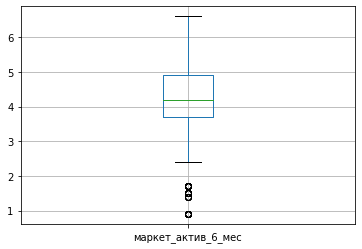


Диаграмма маркет_актив_6_мес


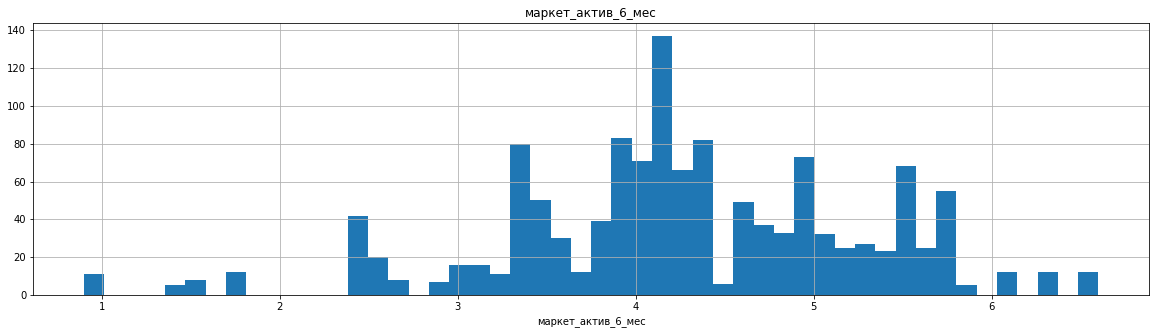

Нижний выброс = 1.9
Верхний выброс = 6.700000000000001
Количество строк с выбросами 36 или 2.77%


In [31]:
col_analize(market_file, market_file_num_col[0], 50)

**Вывод:** Минимальная среднемесячная коммуникация составляет 0.9. Максимальное значение 6.6. Среднее значение равно 4.25. Медианная равна 4.2. Стандартное отклонение 1.01. Гистограмма показывает распределение близкое к нормальному с вершиной около 4.2. Боксплот показывает выбросы при значениях ниже 2.

- минимальная коммуникация 0.9 показывает, что есть пользователи которым коммуникация не рассылается.

#### Анализ столбца `маркет_актив_тек_мес`

Описание столбца


count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64


Размах маркет_актив_тек_мес


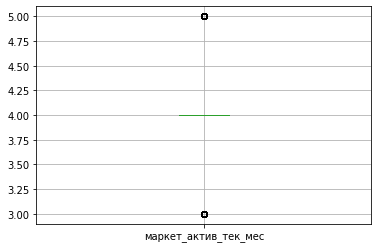


Диаграмма маркет_актив_тек_мес


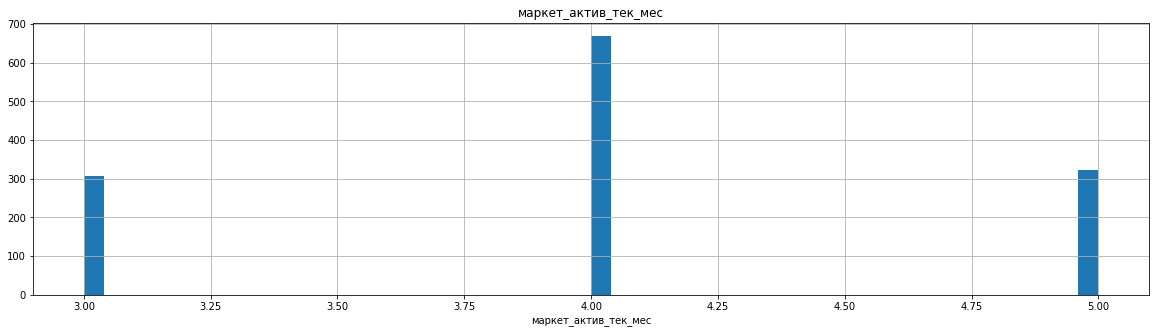

Нижний выброс = 4.0
Верхний выброс = 4.0
Количество строк с выбросами 631 или 48.54%


In [32]:
col_analize(market_file, market_file_num_col[1], 50)

**Вывод:** По сути это категориальный столбец со значениями маркетинговых коммуникаций в количестве 3, 4 и 5 в месяц. Больше всего коммуникаций в количестве 4 (около 650), остальные по 300. В дальнейшем при обучении модели стоит учитывать этот ньюанс столбца.

#### Анализ столбца `длительность`

Описание столбца


count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64


Размах длительность


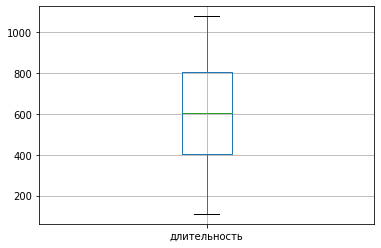


Диаграмма длительность


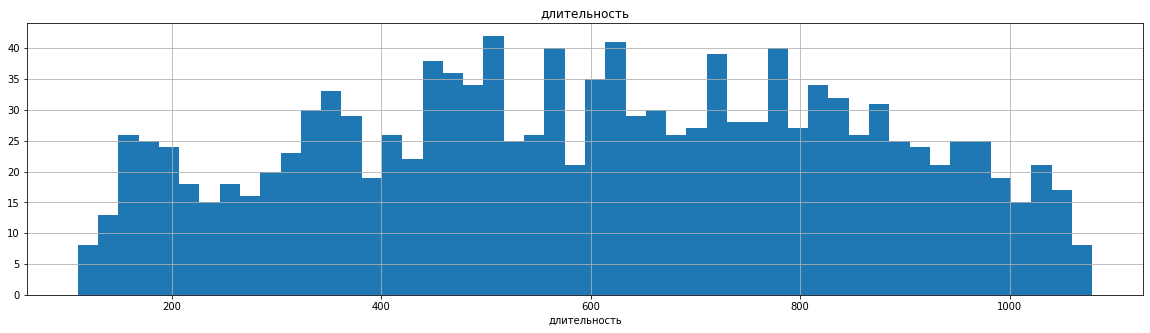

Нижний выброс = -195.25
Верхний выброс = 1406.75
Количество строк с выбросами 0 или 0.00%


In [33]:
col_analize(market_file, market_file_num_col[2], 50)

**Вывод:** Минимальная длительность с момента регистрации составляет 110 дней. Максимальное значение 1079 дней. Среднее значение равно 602. Медианная равна 606. Стандартное отклонение 250. Выбросы отсутствуют.

- согласно зарегестрированному пользователю возраст интернет-магазина почти 3 года;
- почти 4 месяца не было зарегестрированнных новых пользователей, самый "молодой" 110 дней;
- самое большое количество было привлечено с 400 до 800 дней.

#### Анализ столбца `акционные_покупки`

Описание столбца


count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


Размах акционные_покупки


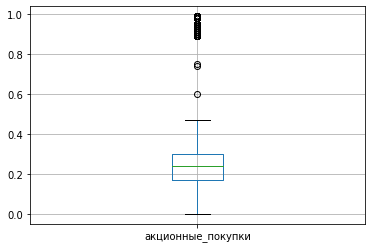


Диаграмма акционные_покупки


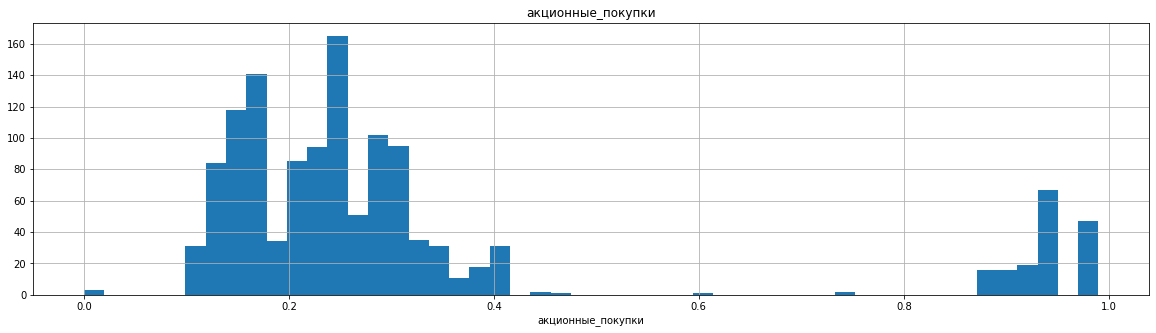

Нижний выброс = -0.02499999999999994
Верхний выброс = 0.49499999999999994
Количество строк с выбросами 168 или 12.92%


In [34]:
col_analize(market_file, market_file_num_col[3], 50)

**Вывод:** Минимальные среднемесячные акционные покупки составляют 0. Максимальное значение 0.99. Среднее значение равно 0.32. Медианная равна 0.24. Стандартное отклонение 0.24. Боксплот показывает выбросы 0.5 168 строк или (12.92%).

- выбросы - это не аномальные значения, скорее всего есть группа пользователей которые покупают только акционные товары.

#### Анализ столбца `средний_просмотр_категорий_за_визит`

Описание столбца


count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64


Размах средний_просмотр_категорий_за_визит


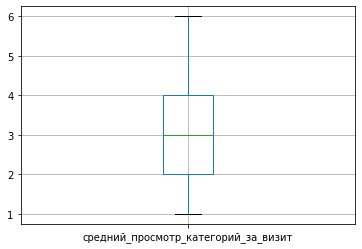


Диаграмма средний_просмотр_категорий_за_визит


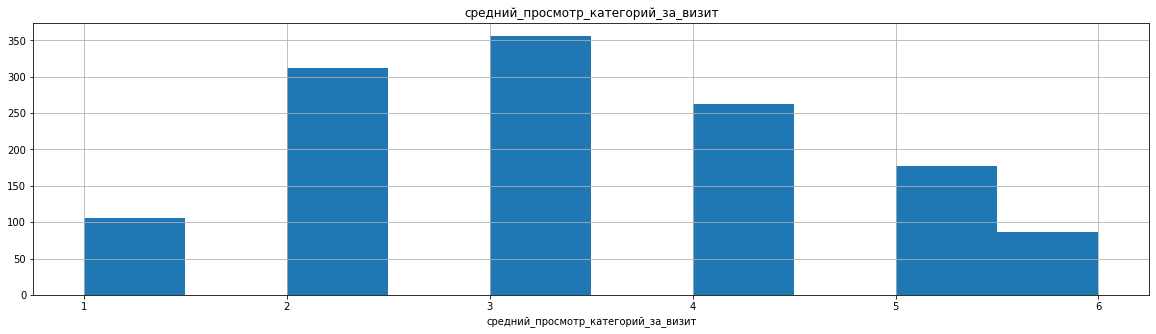

Нижний выброс = -1.0
Верхний выброс = 7.0
Количество строк с выбросами 0 или 0.00%


In [35]:
col_analize(market_file, market_file_num_col[4], 10)

**Вывод:** Минимальный средний просмотр категорий составляют 1. Максимальное значение 6. Среднее значение равно 3.27. Медианная равна 3. Стандартное отклонение 1.36. Выбросы отсутствуют, гистограмма показывает нормальное распределение.

- столбец больше похож на категориальный где можно распределить на низкий, средний, высокий уровни просмотров категорий.

#### Анализ столбца `неоплаченные_продукты_штук_квартал`

Описание столбца


count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


Размах неоплаченные_продукты_штук_квартал


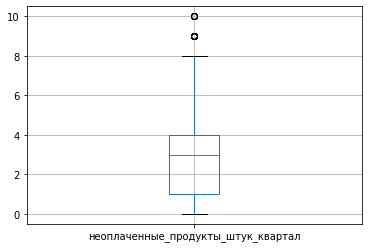


Диаграмма неоплаченные_продукты_штук_квартал


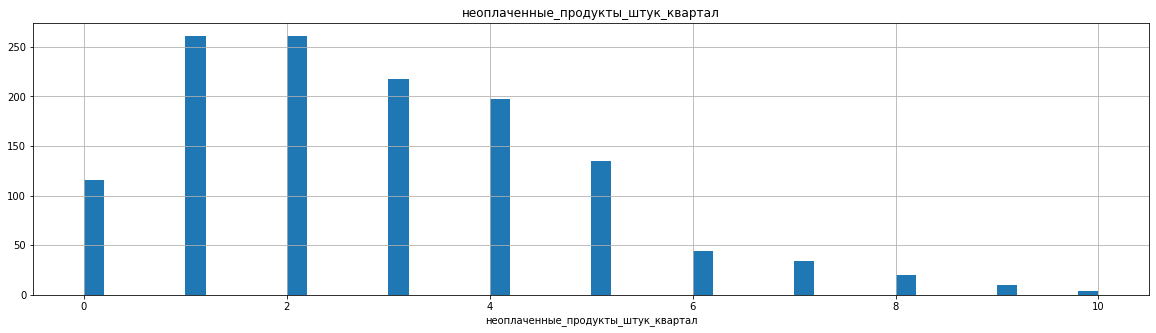

Нижний выброс = -3.5
Верхний выброс = 8.5
Количество строк с выбросами 14 или 1.08%


In [36]:
col_analize(market_file, market_file_num_col[5], 50)

**Вывод:** Минимальный количество неоплаченных покупок в корзине составляют 0. Максимальное значение 10. Среднее значение равно 2.84. Медианная равна 3. Стандартное отклонение 1.97. Выбросы в количестве 14 строк от 8.5, гистограмма показывает нормальное распределение.


#### Анализ столбца `ошибка_сервиса`

Описание столбца


count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64


Размах ошибка_сервиса


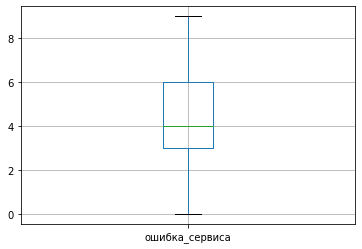


Диаграмма ошибка_сервиса


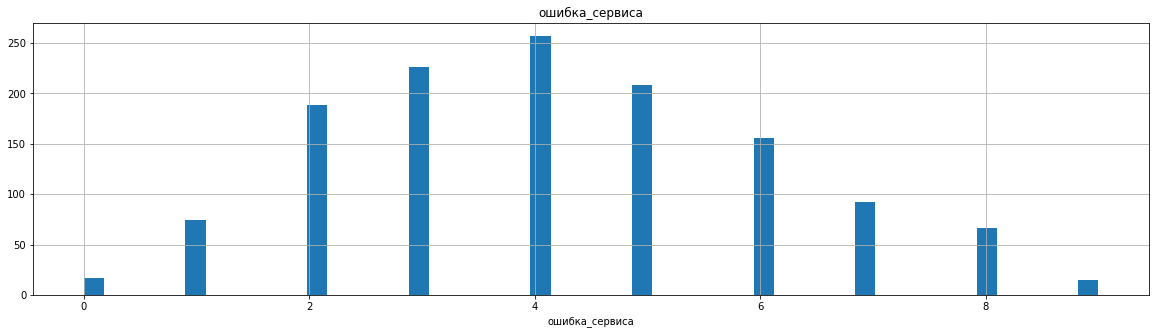

Нижний выброс = -1.5
Верхний выброс = 10.5
Количество строк с выбросами 0 или 0.00%


In [37]:
col_analize(market_file, market_file_num_col[6], 50)

**Вывод:** Минимальная число ошибок составляет 0. Максимальное значение 9. Среднее значение равн 4.19. Медианная равна 4. Стандартное отклонение 1.96. Гистограмма показывает распределение близкое к нормальному с вершиной около 4. Выбросы отсутствуют.
    

#### Анализ столбца `страниц_за_визит`

Описание столбца


count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


Размах страниц_за_визит


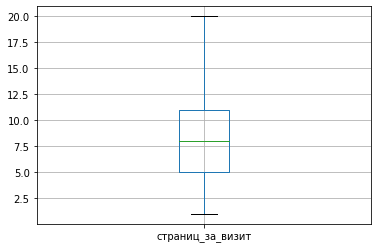


Диаграмма страниц_за_визит


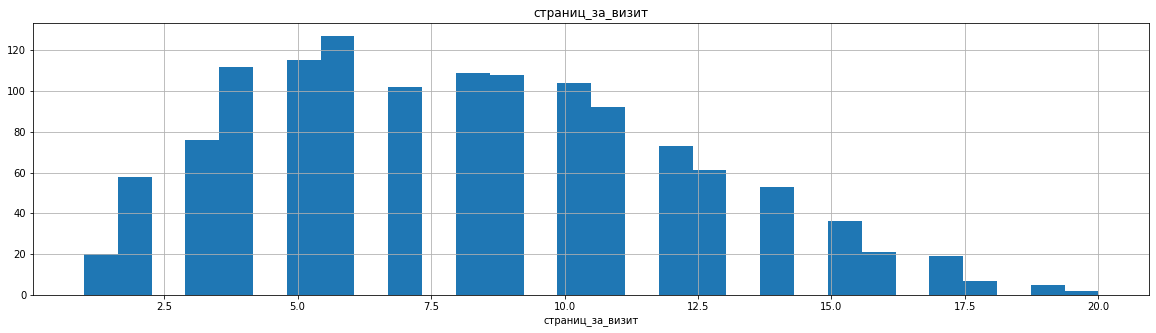

Нижний выброс = -4.0
Верхний выброс = 20.0
Количество строк с выбросами 0 или 0.00%


In [38]:
col_analize(market_file, market_file_num_col[7], 30)

**Вывод:** Минимальная количество страниц составляет 1. Максимальное значение 20. Среднее значение равн 8.18. Медианная равна 8. Стандартное отклонение 3.98. Гистограмма показывает распределение близкое к нормальному с вершиной около 6. Выбросы отсутствуют.

#### Анализ столбца `покупательская_активность`

In [39]:
#создадим функцию которая стоит столбчатую диаграмму:
def bar_plot(df, column):
    ax = sns.countplot(x=df[column],
                       order=df[column].value_counts(ascending=False).index);

    #abs_values = df[column].value_counts(ascending=False).values

    #ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.show()

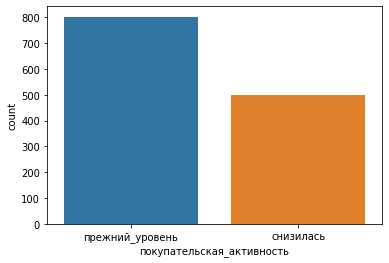

In [40]:
bar_plot(market_file, market_file_cat_col[0])

**Выводы:** Видно, что покупательская активность у 800 пользователей осталась на прежнем уровне, у 500 пользователей снизилась.

#### Анализ столбца `тип_сервиса`

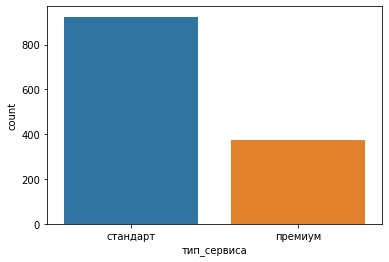

In [41]:
bar_plot(market_file, market_file_cat_col[1])

**Выводы:** Больше чем у 800 пользователей тип сервиса стандарт, у 400 пользователей тип сервиса - премиум.

#### Анализ столбца `разрешить_сообщать`

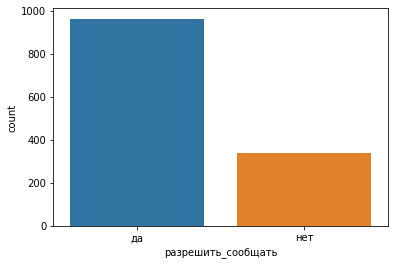

In [42]:
bar_plot(market_file, market_file_cat_col[2])

**Выводы:** Больше 900 пользователей разрешили присылать дополнительные предложения о товаре, около 300 пользователей не разрешили.

#### Анализ столбца `популярная_категория`

<AxesSubplot:title={'center':'Популярная категория'}>

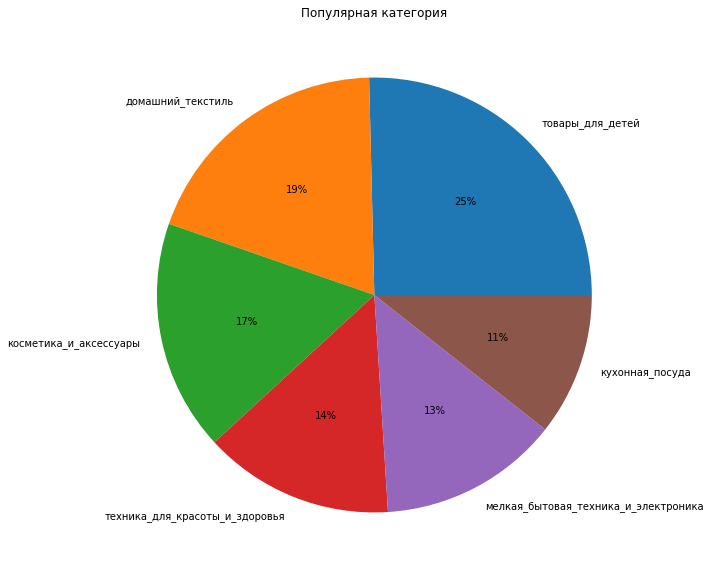

In [43]:
market_file[market_file_cat_col[3]].value_counts().plot.pie(autopct='%1.f%%', figsize=(10, 10), title='Популярная категория', ylabel='')

**Вывод:** 
- популярные категории - товары для детей, домашний текстиль, косметика и аксессуары;
- менее популярные категории - техника для красоты и здоровья, мелкая бытовая техника и электроника, кухонная посуда.

### Датасет `market_money`

In [44]:
market_money_num_col = [
    'выручка'
]
market_money_cat_col = [
    'период'
]

#### Анализ столбца `выручка`

Описание столбца


count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64


Размах выручка


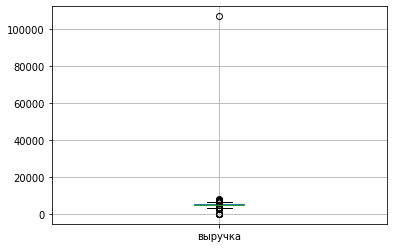


Диаграмма выручка


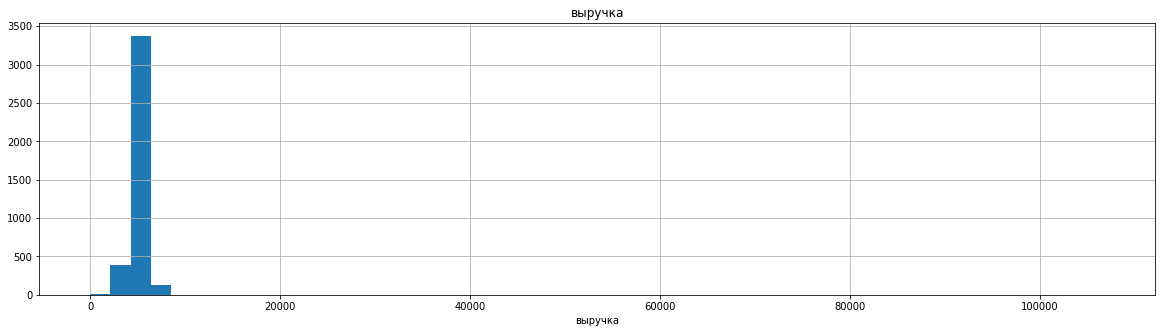

Нижний выброс = 3430.874999999999
Верхний выброс = 6522.275000000001
Количество строк с выбросами 175 или 4.49%


In [45]:
col_analize(market_money, market_money_num_col[0], 50)

Отберем пользователей без покупок за 3 мес.

In [46]:
#отберем пользователей без покупок за 3 мес.
pivot_market_money = pd.pivot_table(market_money, index='id', values='выручка', aggfunc='mean')
print(pivot_market_money.sort_values(by='выручка'))


             выручка
id                  
215348   1097.700000
215359   1578.333333
215357   1995.433333
215564   3479.200000
215716   3525.300000
...              ...
216144   6325.433333
215493   6461.966667
215435   6494.266667
215841   6588.833333
215380  39330.066667

[1300 rows x 1 columns]


**Вывод** Пассивных покупателей, которые не покупали за последние 3 месяца нет.

Найден выброс, убираем:

In [47]:
#убираем выбросы
market_money = market_money[(market_money['выручка'] < 20000) & (market_money['выручка'] > 0)]

Описание столбца


count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64


Размах выручка


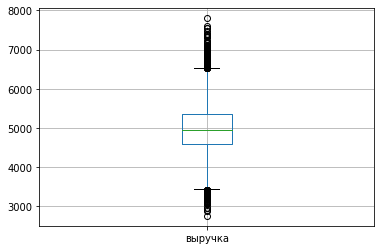


Диаграмма выручка


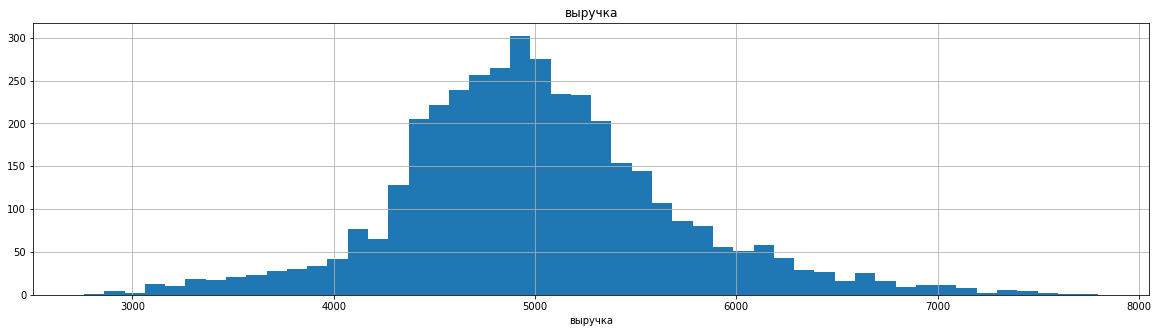

Нижний выброс = 3435.5
Верхний выброс = 6519.5
Количество строк с выбросами 169 или 4.34%


In [48]:
col_analize(market_money, market_money_num_col[0], 50)

**Вывод:** Минимальная выручка составляет 2759. Максимальное значение 7799. Среднее значение равно 5007. Медианная равна 4959. Стандартное отклонение 680. Гистограмма показывает распределение близкое к нормальному с вершиной около 5000. Присутствуют выбросы ниже 3435 и 6520 в количестве 169 (4.34%).

#### Анализ столбца `период`

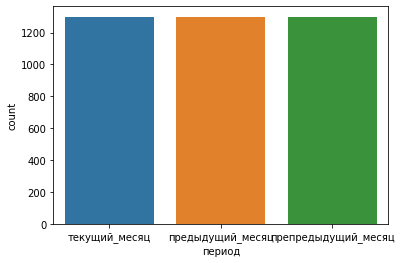

In [49]:
bar_plot(market_money, market_money_cat_col[0])

**Вывод:** Периоды распределены по 1300 строк.

### Датасет `market_time`

In [50]:
market_time_num_col = [
    'минут'
]
market_time_cat_col = [
    'период'
]

Описание столбца


count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64


Размах минут


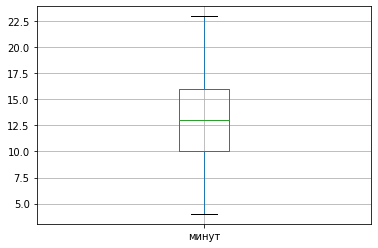


Диаграмма минут


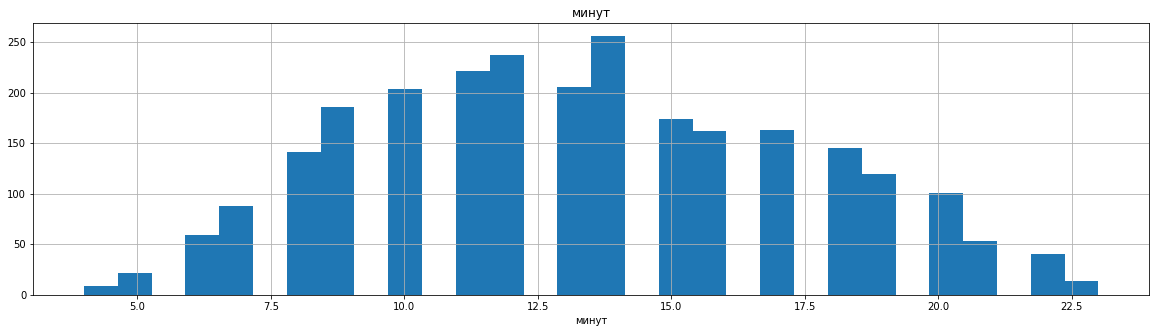

Нижний выброс = 1.0
Верхний выброс = 25.0
Количество строк с выбросами 0 или 0.00%


In [51]:
col_analize(market_time, market_time_num_col[0], 30)

**Вывод:** Минимальная время проведенное на сайте составляет 4 минуты. Максимальное значение 23 минуты. Среднее значение равно 13 минут. Медианная равна 13. Стандартное отклонение 4. Гистограмма показывает распределение близкое к нормальному с вершиной около 14 минут. Выбросы отсутствуют.

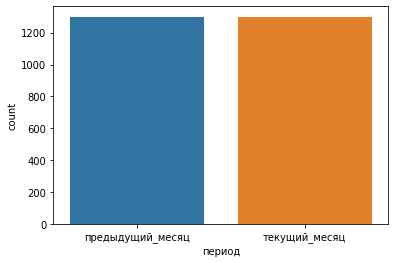

In [52]:
bar_plot(market_time, market_time_cat_col[0])

**Вывод:** Периоды распределены по 1300 строк.

### Датасет `money`

Описание столбца


count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


Размах прибыль


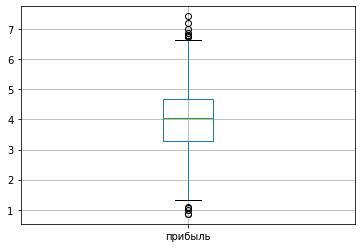


Диаграмма прибыль


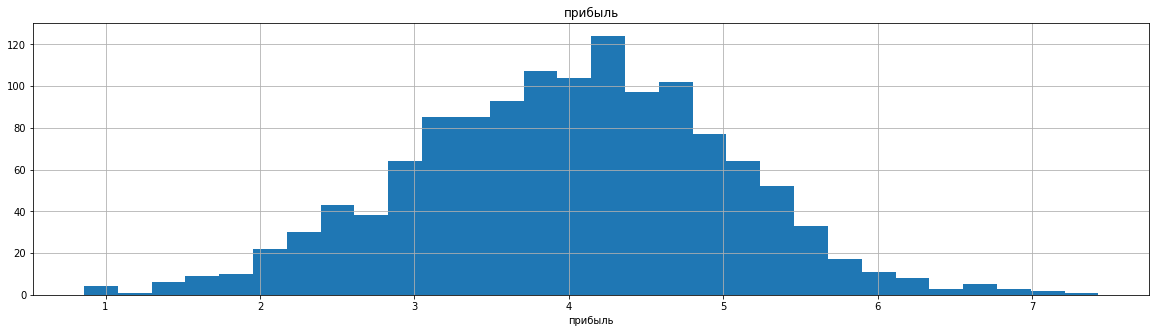

Нижний выброс = 1.2449999999999997
Верхний выброс = 6.725
Количество строк с выбросами 12 или 0.92%


In [53]:
col_analize(money, 'прибыль', 30)

**Вывод:** Минимальная прибыль составляет 0.86. Максимальное значение 7.43. Среднее значение равно 4. Медианная равна 4.05. Стандартное отклонение 1.01. Гистограмма показывает распределение близкое к нормальному с вершиной около 4. Присутствует небольшое количество выбросов.

**Выводы по разделу**

Был проведен исследовательский анализ. Согласно анализу интернет-магазин:
- магазин открыли 3 года назад;
- с товарами категорий: `товары_для_детей`, `домашний_текстиль`, `косметика_и_аксесуары`, `техника_для_красоты_и_здоровья`, `кухонная_посуда`, `мелкая_бытовая_техника_и_электроника`. Самая популярная категория - товары для детей.
- средняя выручка на одного покупателя - 5007 рублей;
- присутствуют маркетинговые активности в среднем 4.27 в месяц на пользователя;
- было привлечено 1300 пользователей, из которых 400 с премиум статусом;

**Возможные проблемы**

- последняя регистрация пользователя была 110 дней назад, 110 дней не привлекались новые пользователи;
- большинство пользователей разрешили присылать дополнительные предложения о товаре, но малое количетсво клиентов покупают акционные товары.


## Объединение таблиц

### Выделяем отдельные столбцы.

Приведем столбец `период` датафрейма `market_money`, в три столбца текущий, предыдуший, предпредыдущий. 

In [54]:
market_money_pivot = market_money.pivot(index='id', columns='период', values='выручка').reset_index()
market_money_pivot.columns = ['id','выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц']
#убираем пользователей без покупок в каком-либо периоде
market_money_pivot = market_money_pivot.dropna()
#проверяем
print(market_money_pivot.shape)
market_money_pivot.head()

(1296, 4)


id  выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
1  215349                    5216.0                       4472.0   
2  215350                    5457.5                       4826.0   
3  215351                    6158.0                       4793.0   
4  215352                    5807.5                       4594.0   
5  215353                    4738.5                       5124.0   

   выручка_текущий_месяц  
1                 4971.6  
2                 5058.4  
3                 6610.4  
4                 5872.5  
5                 5388.5

Приведем столбец `период` датафрейма `market_time`, в три столбца текущий, предыдуший. 

In [55]:
market_time_pivot = market_time.pivot(index='id', columns='период', values='минут').reset_index()
market_time_pivot.columns = ['id','минут_предыдущий_месяц', 'минут_текущий_месяц']
market_time_pivot

id  минут_предыдущий_месяц  минут_текущий_месяц
0     215348                      13                   14
1     215349                      12                   10
2     215350                       8                   13
3     215351                      11                   13
4     215352                       8                   11
...      ...                     ...                  ...
1295  216643                      14                    7
1296  216644                      12                   11
1297  216645                      12                   18
1298  216646                      18                    7
1299  216647                      15                   10

[1300 rows x 3 columns]

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Отлично!  Развернули таблицы.</font>

**Вывод:** Выделены отдельные столбцы для каждого периода.

### Объединяем датафреймы `market_money_pivot` и `market_time_pivot`

In [56]:
market_money_merge = market_money_pivot.merge(market_time_pivot, on='id', how='left')
print(market_money_merge.shape)
market_money_merge.head()

(1296, 6)


id  выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
0  215349                    5216.0                       4472.0   
1  215350                    5457.5                       4826.0   
2  215351                    6158.0                       4793.0   
3  215352                    5807.5                       4594.0   
4  215353                    4738.5                       5124.0   

   выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  
0                 4971.6                      12                   10  
1                 5058.4                       8                   13  
2                 6610.4                      11                   13  
3                 5872.5                       8                   11  
4                 5388.5                      10                   10

### Объединяем датафреймы `market_file` и `market_money_merge`

In [57]:
market_data = market_file.merge(market_money_merge, on='id', how='left')
market_data = market_data.dropna()
print(market_data.shape)
display(market_data.head())
market_data.columns

(1296, 18)


id покупательская_активность тип_сервиса разрешить_сообщать  \
1  215349                 снизилась     премиум                 да   
2  215350                 снизилась    стандарт                нет   
3  215351                 снизилась    стандарт                 да   
4  215352                 снизилась    стандарт                нет   
5  215353                 снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   
5                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
1     товары_для_детей                                    4   
2    домашний_текстиль                                    5   
3     товары_для_детей                                    5   
4     товары_для_детей                                    3   
5    домашний_текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
1                                   4               2                 5   
2                                   2               1                 5   
3                                   0               6                 4   
4                                   2               3                 2   
5                                   1               1                 4   

   выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
1                    5216.0                       4472.0   
2                    5457.5                       4826.0   
3                    6158.0                       4793.0   
4                    5807.5                       4594.0   
5                    4738.5                       5124.0   

   выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  
1                 4971.6                    12.0                 10.0  
2                 5058.4                     8.0                 13.0  
3                 6610.4                    11.0                 13.0  
4                 5872.5                     8.0                 11.0  
5                 5388.5                    10.0                 10.0

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'выручка_предыдущий_месяц',
       'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
       'минут_предыдущий_месяц', 'минут_текущий_месяц'],
      dtype='object')

**Выводы** Объединение столбцов прошло успешно.

In [58]:
market_data.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
выручка_предыдущий_месяц               0
выручка_препредыдущий_месяц            0
выручка_текущий_месяц                  0
минут_предыдущий_месяц                 0
минут_текущий_месяц                    0
dtype: int64

## Корреляционный анализ

Cчитаем корреляции на всём датасете без столбца `id`

In [59]:
phik_overview = phik_matrix(market_data.drop('id', axis=1))

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц']


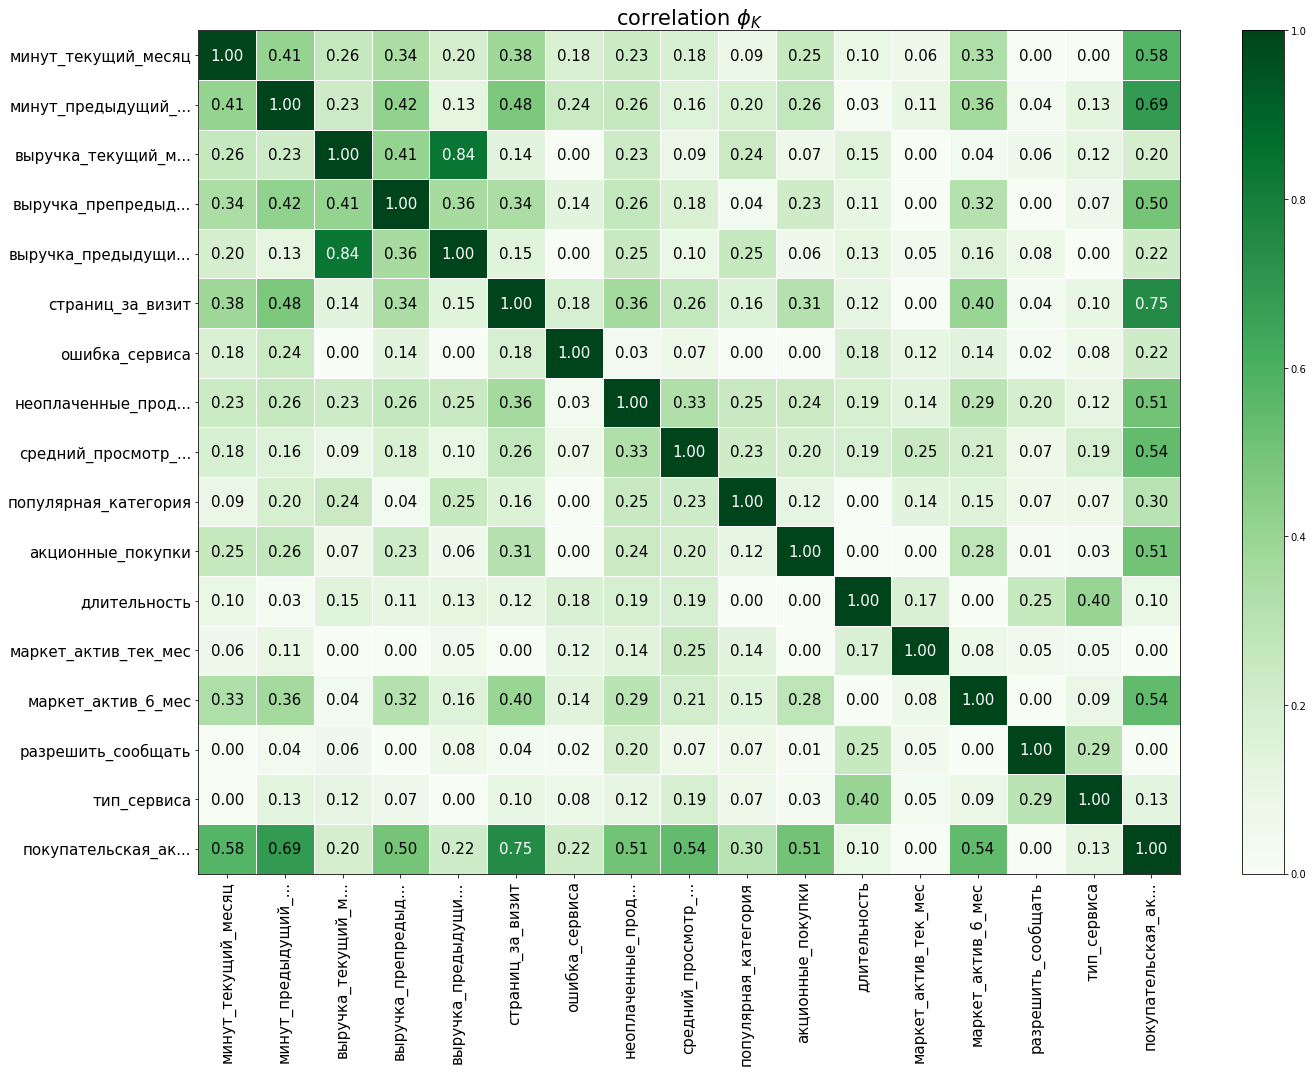

In [60]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

**Выводы**

- самая высокая корреляция между столбцом `страниц_за_визит` и `покупательская_активность`, чем больше пользователь помещает страниц тем больше активность остается на прежнем уровне;
- высокая корреляция между столбцами `минут_текущий_месяц`, `минут_предыдущий_месяц` и `покупательская_активность` чем больше пользователь проводит времени в магазине тем, больше лучше активность;
- средняя корреляция между столбцами `выручка_препредыдущий_месяц`, `неоплаченные_продукты_штук_квартал`, `средний_просмотр_категорий_за_визит`, `акционные покупки`, `маркет_актив_6_мес` и `покупательская_активность` на активность влияют маркетинговые действия и акции.


- Покупательская активность - совокупный показатель, который зависит не только от выручки, но и от количества времени, числа страниц за визит и прочее;
- Утечки данных нет, но есть высокий коэфициент с показателем `страниц_за_визит` равным 0.75.

## Использование пайплайнов

In [61]:
RANDOM_STATE = 77
TEST_SIZE = 0.25

Разбиваем на тренировочную и тестовую выборки:

In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    market_data.drop(['id','покупательская_активность'], axis=1),
    market_data['покупательская_активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = market_data['покупательская_активность'])

X_train.shape, X_test.shape

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

pred_classes = [0, 1]
print(label_encoder.inverse_transform(pred_classes))

X_train.shape, X_test.shape

['прежний_уровень' 'снизилась']


((972, 16), (324, 16))

In [63]:
# создаем списки с названиями признаков
ohe_columns = ['тип_сервиса', 'популярная_категория']
ord_columns = ['разрешить_сообщать']
num_columns = ['маркет_актив_6_мес',
               'маркет_актив_тек_мес',
               'длительность',
               'акционные_покупки',
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',
               'ошибка_сервиса',
               'страниц_за_визит', 'выручка_предыдущий_месяц',
               'выручка_препредыдущий_месяц', 'выручка_текущий_месяц',
               'минут_предыдущий_месяц',
               'минут_текущий_месяц']

In [64]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE

ohe_pipe = Pipeline(
    [('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ohe', OneHotEncoder(drop='first', sparse_output=False, categories='auto'))
    ]
    )
ohe_pipe

Pipeline(steps=[('simpleImputer_ohe', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(drop='first', sparse_output=False))])

In [65]:
#создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[['нет', 'да']],
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)
ord_pipe

Pipeline(steps=[('simpleImputer_before_ord',
                 SimpleImputer(strategy='most_frequent')),
                ('ord',
                 OrdinalEncoder(categories=[['нет', 'да']],
                                handle_unknown='use_encoded_value',
                                unknown_value=nan)),
                ('simpleImputer_after_ord',
                 SimpleImputer(strategy='most_frequent'))])

In [66]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)
data_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['тип_сервиса', 'популярная_категория']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncod...
                                 ['разрешить_сообщать']),
                                ('num', MinMaxScaler(),
                                 ['маркет_актив_6_мес', 'маркет_актив_тек_мес',
                                  'длительность', 'акционные_покупки',
                                  'средний_просмотр_категорий_за_визит',
                                  'неоплаченные_продукты_штук_квартал',
                                  'ошибка_сервиса', 'страниц_за_визит',
                                  'выручка_предыдущий_месяц',
                                  'выручка_препредыдущий_месяц',
                                  'выручка_текущий_месяц',
                                  'минут_предыдущий_месяц',
                                  'минут_текущий_месяц'])])

Создаем итоговый паплайн:

In [67]:
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    },
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': range(1, 20),
        'models__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), RobustScaler(), 'passthrough']  
    }
]

rdcv = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)


Обучаем модель:

In [68]:
rdcv.fit(X_train, y_train)
display('Лучшая модель:', rdcv.best_estimator_)
display('Лучшие параметры модели:', rdcv.best_params_)
display('Метрика лучшей модели на тренировочной выборке:', rdcv.best_score_)

'Лучшая модель:'

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['тип_сервиса',
                                                   'популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most...
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'выручка_предыдущий_месяц',
                                                   'выручка_препредыдущий_месяц',
                                                   'выручка_текущий_месяц',
                                                   'минут_предыдущий_месяц',
                                                   'минут_текущий_месяц'])])),
                ('models', SVC(C=4, probability=True, random_state=77))])

'Лучшие параметры модели:'

{'preprocessor__num': MinMaxScaler(),
 'models__kernel': 'rbf',
 'models__C': 4,
 'models': SVC(probability=True, random_state=77)}

'Метрика лучшей модели на тренировочной выборке:'

0.9074156801429529

Рассчитываем прогноз на тестовой выборке:

In [69]:
y_test_pred = rdcv.predict(X_test)
probabilities = rdcv.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, probabilities)}')

Метрика ROC-AUC на тестовой выборке: 0.8898790322580645


**Выводы**

Подготовлен паплайн в котором:

- созданы списки с названиями признаков столбцов для кодирования и скалирования;
- созданы паплайны с охе, орд кодированием;
- создан итоговый паплайн с 4-мя моделями `KNeighborsClassifier()`, `DecisionTreeClassifier()`, `LogisticRegression()`, `SVC()`;
- в каждой модели по три скалера `StandardScaler()`, `MinMaxScaler()`, `RobustScaler()`

Модель `DecisionTreeClassifier()`

- перебирались гиперпараметры `max_depth` (максимальная глубина), `max_features` (максимальное количество признаков) от 2 до 10

Модель `LogisticRegression()`

- перебирались гиперпараметры `С` регуляризация от 1 до 10

Модель `SVC()`

- перебирались гиперпараметры `C` регуляризация от 1 до 20, `kernel` ядра - `linear`, `rbf`, `poly`, `sigmoid`.

Модели с гиперпараметрами перебирались сплошным методом `randomizedsearch`.

В качестве метрики модели выбран показатель `roc-auc` - это общая метрика, которая учитывает работу модели при всех возможных значениях порогов.

**Лучшая модель** 

`SVC` с параметрами ядро `rbf` со степенью 4

Лучший скалер - `MinMaxScaler()`.

На тренировочной выборке вышел хороший показатель `roc-auc` = 0.91

На тестовой выборке показетель меньше и составляет = 0.89.

## Анализ важности признаков

Построим график общей значимости признаков

In [96]:
print(best_model[0])

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False))]),
                                 ['тип_сервиса', 'популярная_категория']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  OrdinalEncod...
                                 ['разрешить_сообщать']),
                                ('num', MinMaxScaler(),
        

In [1]:
best_model = rdcv.best_estimator_
X_train_preprocessor = best_model[0].transform(X_train)

feature_names = best_model[0].get_feature_names_out()

print(best_model[1])
X_train_preprocessor = pd.DataFrame(X_train_preprocessor, columns=feature_names)

X_train_shap = X_train_preprocessor.sample(80, random_state=RANDOM_STATE)
display(X_train_shap.head())
explainer = shap.KernelExplainer(best_model[1].predict_proba, X_train_shap)
shap_values = explainer(X_train_shap)
shap.plots.bar(shap_values[:,:,1], max_display=17)

NameError: name 'rdcv' is not defined

- лидирует - страниц_за_визит;
- следующие по значимости признаки - минут_предыдущий месяц, средний_просмотр_категорий_за_визит, минут_текущий_месяц;
- на третьем месте признаки - акционные_покупки.

Посмотрим, как признаки влияют на каждое предсказание модели:

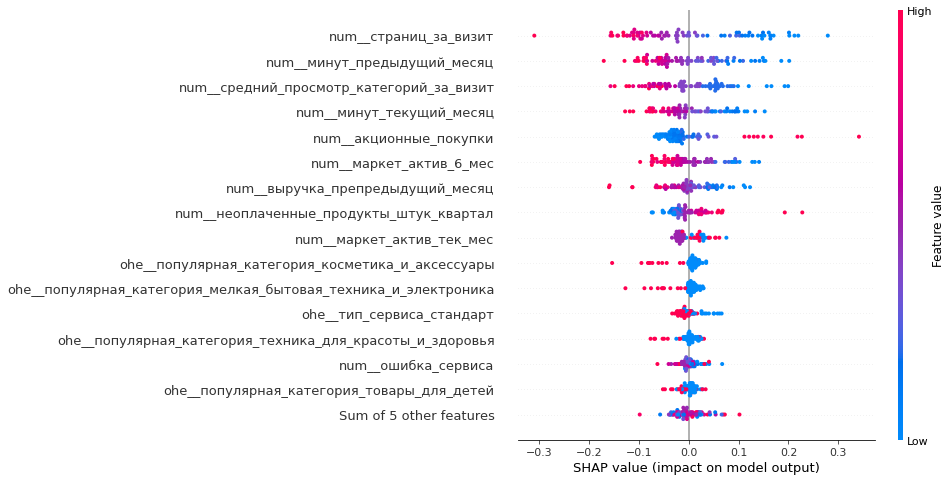

In [71]:
shap.plots.beeswarm(shap_values[:,:,1], max_display=16)

- Высокое (по сути категориальное значение единица) значение `страниц_за_визит` снижает вероятность принадлежность к классу 1 (активность снизилась);
- `минут_предыдущий_месяц` высокие значения снижают вероятность принадлежности к классу 1;
- `средний_просмотр_категорий_за_визит` высокие значения снижают вероятность принадлежности к классу 1;
- `минут_текущий месяц` высокие значения снижают вероятность принадлежности к классу 1;
- `акционные_покупки` высокие значения увеличивают вероятность принадлежности к классу 1.

## Сегментация покупателей

### Объединяем данные.

In [72]:
full_predict = rdcv.predict_proba(market_data.drop(['id', 'покупательская_активность'], axis=1))[:,1]
market_data['вероятность_снижения'] = full_predict

#добавим столбец с прибылью

market_data_merge = pd.merge(market_data, money, on='id', how='left')
market_data_merge = market_data_merge.dropna()
market_data_merge.head()

id покупательская_активность тип_сервиса разрешить_сообщать  \
0  215349                 снизилась     премиум                 да   
1  215350                 снизилась    стандарт                нет   
2  215351                 снизилась    стандарт                 да   
3  215352                 снизилась    стандарт                нет   
4  215353                 снизилась    стандарт                 да   

   маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
0                 4.4                     4           819               0.75   
1                 4.9                     3           539               0.14   
2                 3.2                     5           896               0.99   
3                 5.1                     3          1064               0.94   
4                 3.3                     4           762               0.26   

  популярная_категория  средний_просмотр_категорий_за_визит  \
0     товары_для_детей                                    4   
1    домашний_текстиль                                    5   
2     товары_для_детей                                    5   
3     товары_для_детей                                    3   
4    домашний_текстиль                                    4   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   4               2                 5   
1                                   2               1                 5   
2                                   0               6                 4   
3                                   2               3                 2   
4                                   1               1                 4   

   выручка_предыдущий_месяц  выручка_препредыдущий_месяц  \
0                    5216.0                       4472.0   
1                    5457.5                       4826.0   
2                    6158.0                       4793.0   
3                    5807.5                       4594.0   
4                    4738.5                       5124.0   

   выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  \
0                 4971.6                    12.0                 10.0   
1                 5058.4                     8.0                 13.0   
2                 6610.4                    11.0                 13.0   
3                 5872.5                     8.0                 11.0   
4                 5388.5                    10.0                 10.0   

   вероятность_снижения  прибыль  
0              0.938037     4.16  
1              0.582681     3.13  
2              0.923409     4.87  
3              0.907730     4.21  
4              0.806910     3.95

In [73]:
customer_segment = market_data_merge[(market_data_merge['прибыль'] > 4) & (market_data_merge['вероятность_снижения'] > 0.8)]

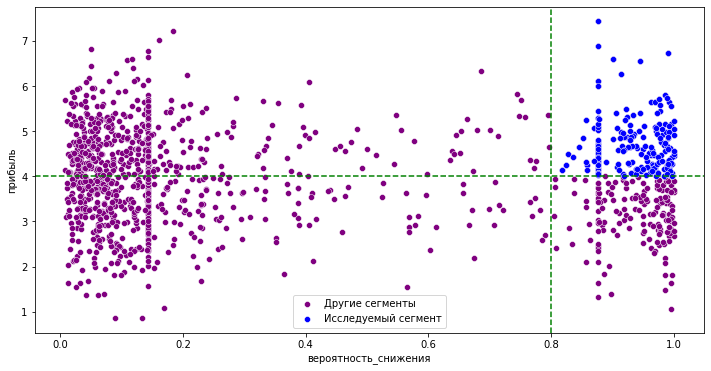

In [74]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=market_data_merge, x='вероятность_снижения', y='прибыль', label='Другие сегменты', color='purple')
sns.scatterplot(data=customer_segment, x='вероятность_снижения', y='прибыль', label='Исследуемый сегмент', color='blue')
plt.legend()
plt.axvline(x=0.8, color='green', linestyle='--')
plt.axhline(y=4, color='green', linestyle='--')

Определим группу клиентов из выбранного сегмента по категории `товар_для_детей`

In [75]:
customer_segment['категория'] = customer_segment['популярная_категория'].apply(
    lambda x: 'товары_для_детей' if x == 'товары_для_детей' else 'другие'
)

/tmp/ipykernel_118/2468221954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_segment['категория'] = customer_segment['популярная_категория'].apply(


### Проводим сегментацию

Добавляем столбец `прибыль` в список с количественными признаками:

In [76]:
num_columns.append('прибыль')
print(num_columns)

['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_предыдущий_месяц', 'выручка_препредыдущий_месяц', 'выручка_текущий_месяц', 'минут_предыдущий_месяц', 'минут_текущий_месяц', 'прибыль']


Определим понятие высокая прибыльность:

In [77]:
def analize_seg(df, column):
    fig = px.histogram(
        df,
        x = column, # количественный признак
        title=column,
        color = 'категория', # категориальный признак
        opacity=0.5,
        nbins=30,
        labels={column:column, 'категория':'категория'},
        marginal = 'box'
    ) # дополнительный график: boxplot
    fig.show()

In [78]:
analize_seg(customer_segment, num_columns[0])

**Вывод:** Маркетинговые активности у рассматриваемого сегмента выше.

In [79]:
analize_seg(customer_segment, num_columns[1])

**Вывод** У рассматриваемого сегмента количество маркетинговых коммуникаций в текущем месяце больше.

In [80]:
analize_seg(customer_segment, num_columns[2])

**Вывод** "возраст" покупателей примерно одинаков.

In [81]:
analize_seg(customer_segment, num_columns[3])

**Вывод** Покупатели рассматриваемого сегмента, чуть больше склоняются к акционным покупкам.

In [82]:
analize_seg(customer_segment, num_columns[4])

**Вывод** Покупатели из рассматриваемого сегмента, чуть меньше просматривают категорий за один визит.

In [83]:
analize_seg(customer_segment, num_columns[5])

**Вывод** Покупатели из рассматриваемого сегмента, меньше оставляют неоплаченных покупок в корзине

In [84]:
analize_seg(customer_segment, num_columns[6])

**Вывод** У рассматриваемого сегмента ошибок_сервиса чуть больше.

In [85]:
analize_seg(customer_segment, num_columns[7])

**Вывод** Страниц за визит одинаков.

In [86]:
analize_seg(customer_segment, num_columns[8])

**Вывод** У рассматриваемого сегмента выручка за предыдущий месяц ниже.

In [87]:
analize_seg(customer_segment, num_columns[9])

**Вывод** Выручка за препредыдущий месяц немного выше.

In [88]:
analize_seg(customer_segment, num_columns[10])

**Вывод** Выручка за текущий месяц ниже.

In [89]:
analize_seg(customer_segment, num_columns[11])

**Вывод** У рассматриваемого сегмента минут проведенных на сайте за предыдущий месяц заметно меньше.

In [90]:
analize_seg(customer_segment, num_columns[12])

**Вывод** У рассматриваемого сегмента минут проведенных одинаково.

In [91]:
analize_seg(customer_segment, num_columns[13])

**Вывод** Медианная прибыль меньше.

**Категориальные показатели**

Создадим функцию:

In [92]:
def cross_tab(df, column):
    pivot_df = pd.crosstab(index = df[column], columns = df['категория'], normalize = 'index')
    display(pivot_df)
    pivot_df.plot.barh(rot = 0, fontsize=10)

категория      другие  товары_для_детей
тип_сервиса                            
премиум      0.764706          0.235294
стандарт     0.611111          0.388889

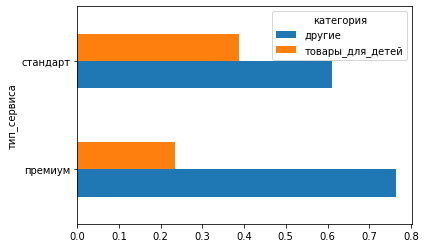

In [93]:
cross_tab(customer_segment, market_file_cat_col[1])

**Вывод** У покупателей с сервисом премиум, меньше доля товаров_для_детей.

категория             другие  товары_для_детей
разрешить_сообщать                            
да                  0.678322          0.321678
нет                 0.627451          0.372549

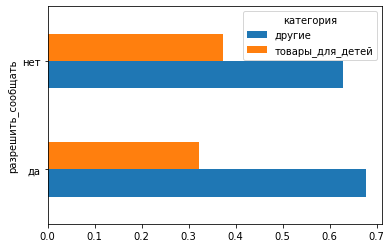

In [94]:
cross_tab(customer_segment, market_file_cat_col[2])

**Вывод** Одобрение о рассылке не влияет.

**Общий вывод**

В рассматриваемом сегменте следующие особенности:
- выше уровень маркетинговой активности;
- количество маркетинговых коммуникаций больше;
- больше склоняются к акционным покупкам;
- меньше просматривают категорий;
- меньше оставляют неоплачивают покупок в корзине;
- чуть больше ошибок в сервисе;
- меньше минут за предыдущий и текущий месяцы;
- больше типа сервиса стандарт;
- прибыль меньше.

Резюме.  Данный сегмент знает что покупать, в основном отлавливает акционные покупки, меньше выбирает. Больше покупает привычные товары. 

Рекомендации. В маркетинговой активности больше предлагать акционные товары из товары для детей.


## Общий вывод

Главная задача проекта.
Разработать модель прогноза покупательской активности и разработать рекомендации по ее увеличению.

В качестве начальных исходных данных было представлено 4 датасета:
- `market_file.csv` таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении;
- `market_money.csv` таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом;
- `market_time.csv` таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода;
- `money.csv` таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

Была произведены предобработка данных:
- пропуски отсутсвовали;
- приведены названия столбцов и значения к "змеиному" виду;
- явные дубликаты отсутвовали;
- устранены неявные дубликаты и ошибки.

Для поиска лучшей модели подготовлен паплайн в котором:

- созданы списки с названиями признаков столбцов для кодирования и скалирования;
- созданы паплайны с охе, орд кодированием;
- создан итоговый паплайн с 4-мя моделями `KNeighborsClassifier()`, `DecisionTreeClassifier()`, `LogisticRegression()`, `SVC()`;
- в каждой модели по три скалера StandardScaler(), MinMaxScaler(), RobustScaler()

Модель `KNeighborsClassifier()`. Перебирался гиперпараметр `n_neighbors` (количество соседей) от 2 до 10

Модель `DecisionTreeClassifier()`. Перебирались гиперпараметры `max_depth` (максимальная глубина), `max_features` (максимальное количество признаков) от 2 до 10

Модель `LogisticRegression()`. Перебирались гиперпараметры С регуляризация от 1 до 5

Модель `SVC()`. Перебирались гиперпараметры C регуляризация от 1 до 10, kernel ядра - `linear`, `rbf`, `poly`, `sigmoid`.

Модели с гиперпараметрами перебирались сплошным методом randomizedsearch.

В качестве метрики модели выбран показатель `roc-auc` - это общая метрика, которая учитывает работу модели при всех возможных значениях порогов.

Лучшая модель

`SVC` с параметрами ядро `rbf` со степенью 4

Лучший скалер - `MinMaxScaler()`.

На тренировочной выборке вышел хороший показатель `roc-auc` = 0.91

На тестовой выборке показетель меньше и составляет = 0.89.

Был проанализирован сегмент - `Группа клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью` с категорией товара `товары_для_детей`

- для увеличени покупательской активности рекомендуется больше проводить маркетинговые активности с акционными товарами из категорий товары для детей
- внедрить рекомендательную систему в ленту товаров.